
**Question 2**

Used MNIST dataset to perform following tasks:
*   Applying PCA(using sklearn) on the given data with the hyperparameter
n components = 15, 8, 3
*   Applying LDA(use sklearn) on the transformed data.
*   Plotting Accuracy vs n Components


In [ ]:
import gzip
from sklearn.decomposition import PCA

def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')

        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

train_x = images_file_read("/content/drive/MyDrive/train-images-idx3-ubyte.gz")
train_y = labels_file_read("/content/drive/MyDrive/train-labels-idx1-ubyte.gz")
test_x = images_file_read("/content/drive/MyDrive/t10k-images-idx3-ubyte.gz")
test_y = labels_file_read("/content/drive/MyDrive/t10k-labels-idx1-ubyte.gz")

train_x = train_x.reshape(train_x.shape[0],784)
test_x = test_x.reshape(test_x.shape[0],784)

def Q2(x,train_x,test_x):
  p=PCA(n_components=x)
  p.fit(train_x)
  train_x=p.transform(train_x)
  test_x=p.transform(test_x)
  
  lda = LinearDiscriminantAnalysis()
  train_x = lda.fit(train_x, train_y)
  y_pred=lda.predict(test_x)

  # train_x = lda.fit_transform(train_x, train_y)
  # test_x = lda.transform(test_x)
  # classifier = RandomForestClassifier()
  # classifier.fit(train_x, train_y)
  # y_pred = classifier.predict(test_x)

  # print('Accuracy : ' + str(accuracy_score(test_y, y_pred)))
  # conf_m = confusion_matrix(test_y, y_pred)

  # for i in range(0,10):
  #   sum=0
  #   for j in range(0,10):
  #     sum+=conf_m[i][j]
  #   print(str(i) + ' Accuracy : ' + str(conf_m[i][i]/sum))

  return accuracy_score(test_y, y_pred)

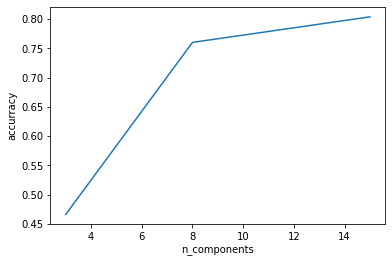

In [ ]:
X=[15,8,3]
Y=[Q2(15,train_x,test_x),Q2(8,train_x,test_x),Q2(3,train_x,test_x)]

plt.plot(X,Y)

plt.xlabel('n_components')
plt.ylabel('accurracy')

plt.show()